## Final Project Submission - Book 2

Please fill out:
* Student name: Dicchyant Gurung
* Student pace: Self paced 
* Scheduled project review date/time: 6/9/2021
* Instructor name: Jeff Herman
* Blog post URL:https://dicchyanttamu.wixsite.com/data/post/line-graph-visualization


### Business Case

The Vehicle Safety Board is looking to reduce the number of accidents in the City of Chicago. Utilizing the car crash data received from the Chicago Data Portal, we will perform some meaningful EDA and provide recommendations to the Vehicle Safety Board.

Firstly, we will do some data exploration to answer the following three problem statements. We will then use the results to identify areas for improvement and come up with actionable steps that will help reduce the number of accidents in the City of Chicago.

**1. Identify high-density areas of car crash in Chicago**

**2. Analyze control failures to identify opportunities for improvement**

**3. Check for trends in the time of crash to relocate resources appropriately**

Furthermore, we will create a classifier to categorize the accidents in two main cateogories for future references:

**1. Unintentional:** These are events or instances where the driver was unaware of the possibility of an accident.

**2. Intentional:** These are events or instances where the driver was fully aware of the possibility of an accident.

### Book 2: Perform EDA

> **1. Identify high-density areas of car crash in Chicago**

> **2. Analyze control failures to identify opportunities for improvement**

> **3. Check for trends in the time of crash to relocate resources appropriately**

### Import relevant packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point

### Load the data

In [2]:
df_final = pd.read_csv('car_crash_final.csv')

In [3]:
df_final.shape

(404326, 21)

In [4]:
df_final.AGE

0         37
1         32
2         37
3         41
4         50
          ..
404321    20
404322    71
404323    59
404324    21
404325    40
Name: AGE, Length: 404326, dtype: int64

In [5]:
# Age seems to be set as integers, but we need them as objects since we are looking to classify them
df_final.AGE = df_final.AGE.map(lambda x : str(x))

### Prepare the data

In [6]:
X = df_final.drop(['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 
                   'CRASH_MONTH', 'LONGITUDE', 'LATITUDE', 'LOCATION'], axis=1).copy()
y = df_final.PRIM_CONTRIBUTORY_CAUSE

In [7]:
# Convert predictors into dummies
X = pd.get_dummies(X, drop_first=True)

In [8]:
X.shape

(404326, 207)

### Train-Test Split

In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Scale the data

In [10]:
#Instantiate Standard Scaler
scaler = StandardScaler()

# Fit and transform train and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Importance Using Random Forest

In [11]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)  

RandomForestClassifier()

In [12]:
labels = list(X_train.columns)

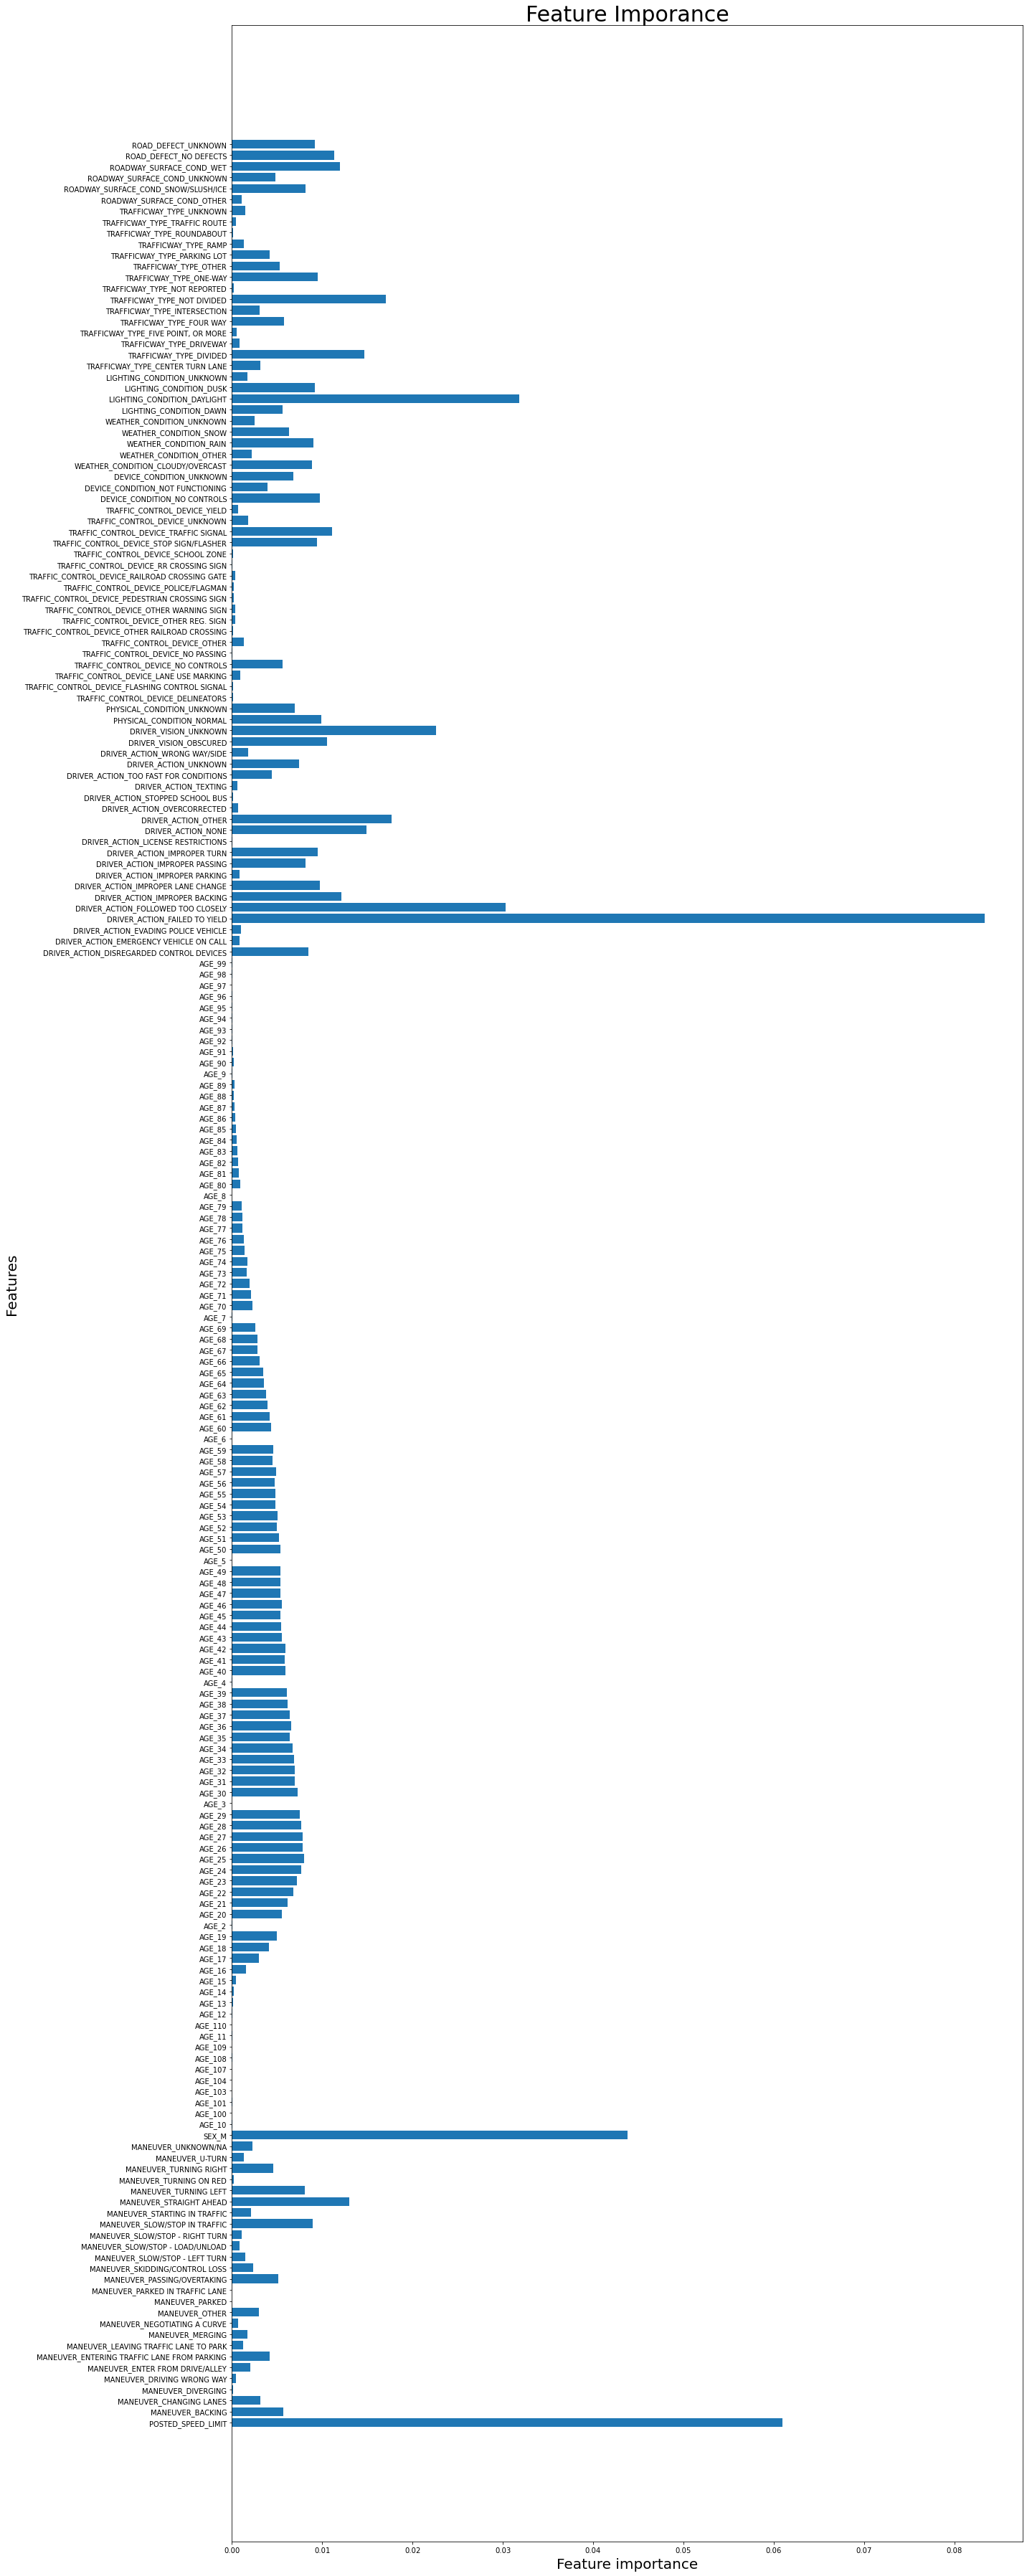

In [13]:
# Plot feature importances
n_features = X_train_scaled.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), rfc.feature_importances_, align='center') 
plt.yticks(np.arange(n_features),labels=labels)
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.savefig(r'Graphs\feat_imp_main.png', bbox_inches='tight')

We can use the feature importance mean to use as a cut-off point for imporantant vs non-important features.

In [33]:
selected_features = X_train.columns[rfc.feature_importances_ > rfc.feature_importances_.mean()]

In [15]:
print(selected_features)

Index(['POSTED_SPEED_LIMIT', 'MANEUVER_BACKING', 'MANEUVER_PASSING/OVERTAKING',
       'MANEUVER_SLOW/STOP IN TRAFFIC', 'MANEUVER_STRAIGHT AHEAD',
       'MANEUVER_TURNING LEFT', 'SEX_M', 'AGE_19', 'AGE_20', 'AGE_21',
       'AGE_22', 'AGE_23', 'AGE_24', 'AGE_25', 'AGE_26', 'AGE_27', 'AGE_28',
       'AGE_29', 'AGE_30', 'AGE_31', 'AGE_32', 'AGE_33', 'AGE_34', 'AGE_35',
       'AGE_36', 'AGE_37', 'AGE_38', 'AGE_39', 'AGE_40', 'AGE_41', 'AGE_42',
       'AGE_43', 'AGE_44', 'AGE_45', 'AGE_46', 'AGE_47', 'AGE_48', 'AGE_49',
       'AGE_50', 'AGE_51', 'AGE_52', 'AGE_53', 'AGE_55', 'AGE_57',
       'DRIVER_ACTION_DISREGARDED CONTROL DEVICES',
       'DRIVER_ACTION_FAILED TO YIELD', 'DRIVER_ACTION_FOLLOWED TOO CLOSELY',
       'DRIVER_ACTION_IMPROPER BACKING', 'DRIVER_ACTION_IMPROPER LANE CHANGE',
       'DRIVER_ACTION_IMPROPER PASSING', 'DRIVER_ACTION_IMPROPER TURN',
       'DRIVER_ACTION_NONE', 'DRIVER_ACTION_OTHER', 'DRIVER_ACTION_UNKNOWN',
       'DRIVER_VISION_OBSCURED', 'DRIVER_VISION_U

Let's plot the selected features.

In [16]:
scores = rfc.feature_importances_

In [17]:
selected_features_scores = scores[rfc.feature_importances_ > rfc.feature_importances_.mean()]

In [18]:
labels_selected = list(selected_features)

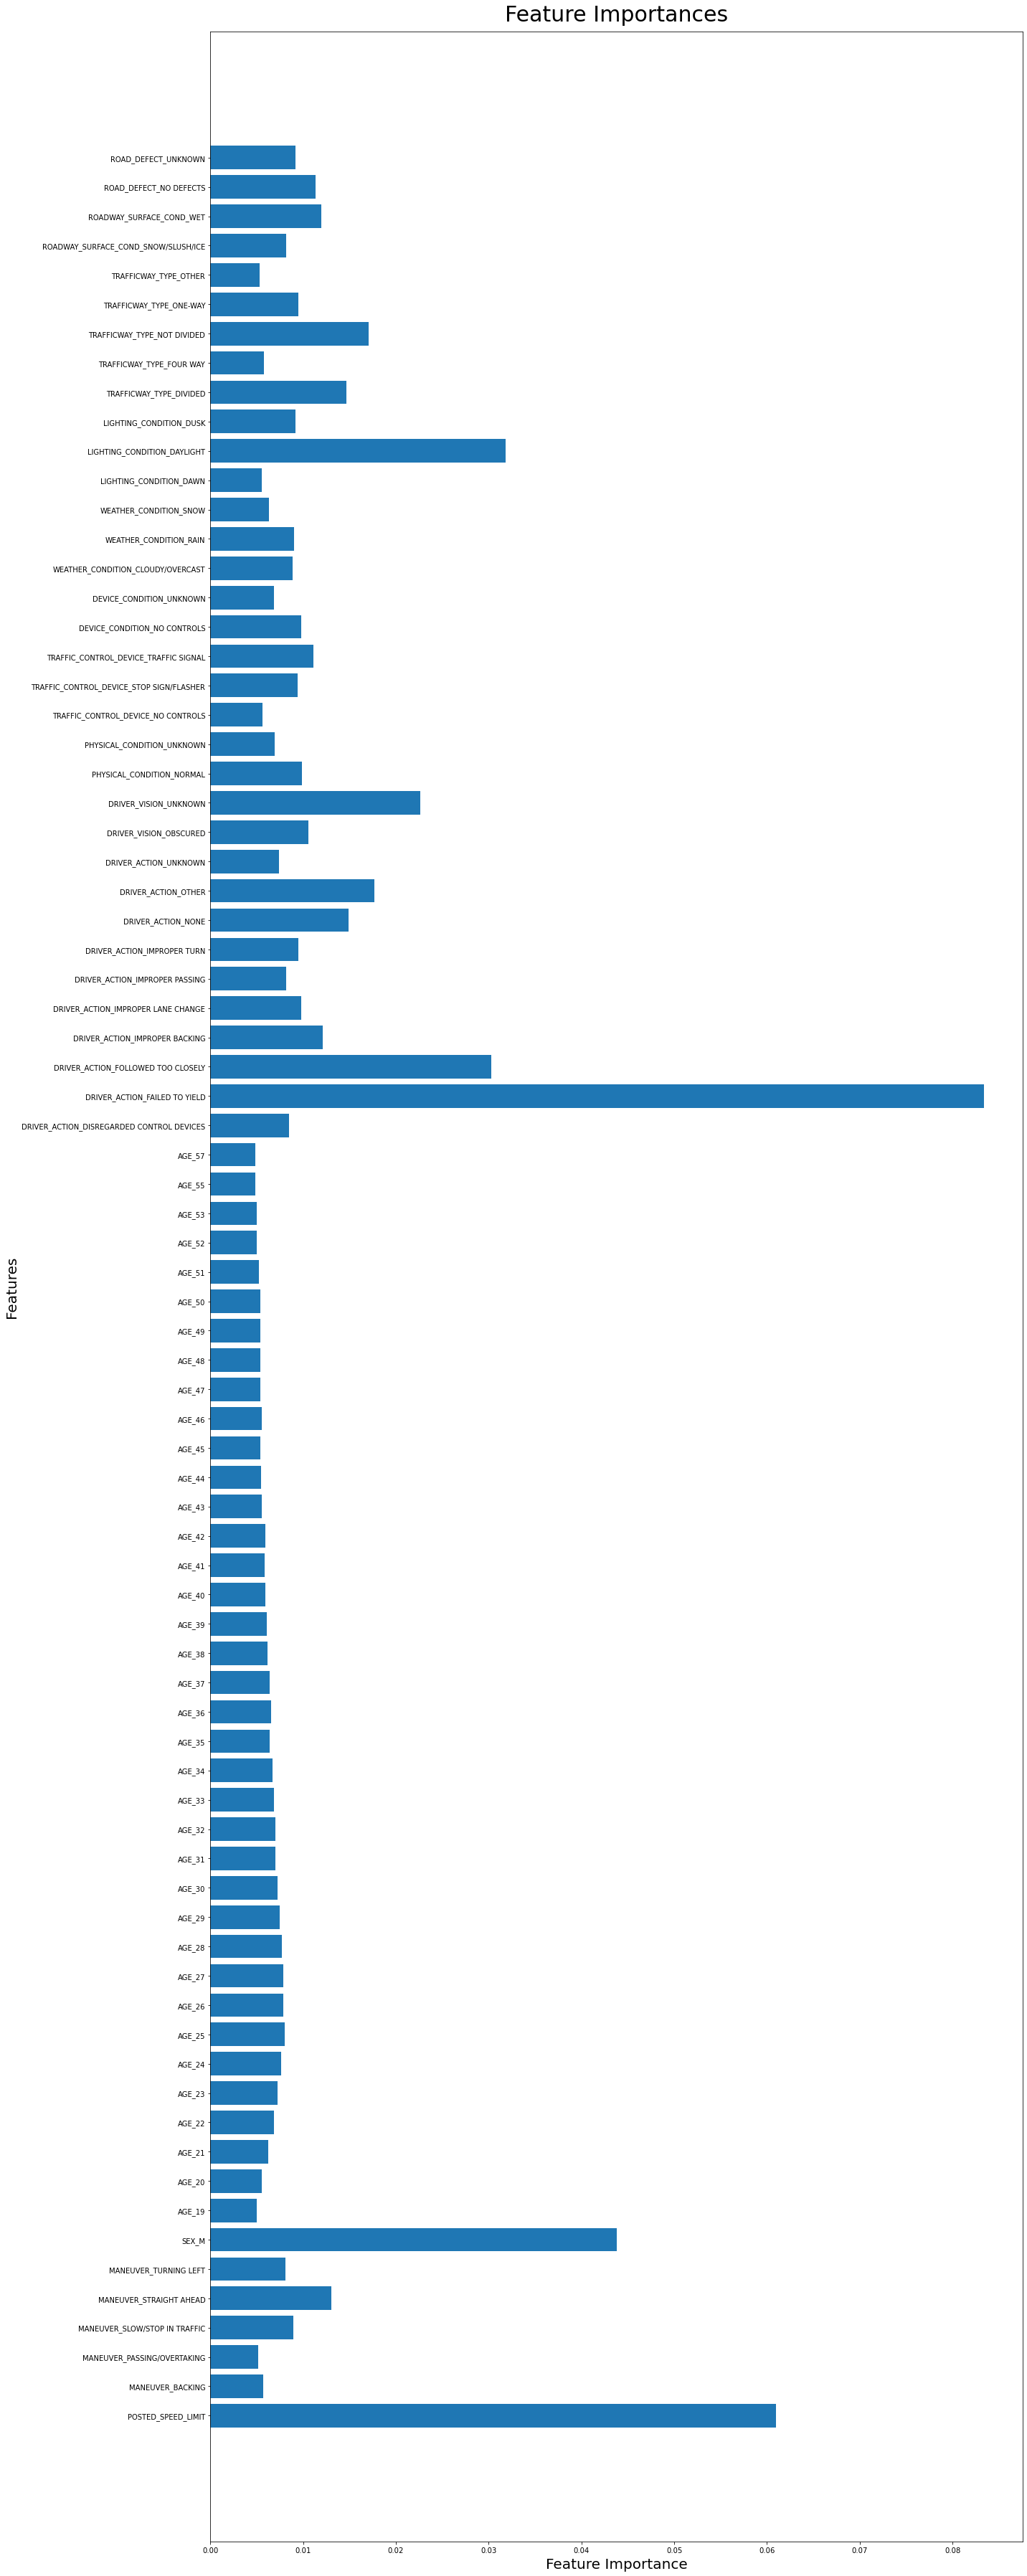

In [19]:
# Plot feature importances
n_features = len(selected_features)
plt.figure(figsize=(20,50))
plt.barh(range(n_features), selected_features_scores, align='center') 
plt.yticks(np.arange(n_features),labels=labels_selected)
plt.title('Feature Importances', fontsize=30, pad=15)
plt.xlabel('Feature Importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.savefig(r'Graphs\feat_imp_selected.png', bbox_inches='tight');

Selecting features of importance that are higher than the mean gives us a good insight on the causes of the accidents. Comparing this list with the plot above, we can make out some characterstics about the accidents.

* DRIVER_ACTION_FAILED_TO_YIELD seems to be the most important feature, followed by POSTED_SPEED_LIMIT and SEX_M. This means that these are great predictors to what type of accidents these actions are causing ('INTENATIONAL', or 'UNINTENTIONAL').
* We also see a trend in age from 19 to 55. The most important age here is 25 after which we see a decreasing trend. This means that drivers are at the most risk of accidents at the age of 25 and decreases as they grow older.
* Traffic controls, weather condition, trafficway type and road conditions also make the list which means that these characterstics are high predictors of an accident. We will look more in depth for these in our case analysis.

With the feature importances in mind, let's move into EDA and analyze the data to support our business case.

1. Identify high-density areas of car crash in Chicago
2. Analyze control failures to identify opportunities for improvement
3. Check for trends in the time of crash to relocate resources appropriately

### EDA 1: Identify high-density areas of car crash in Chicago

We will use the latitudes and longitudes to find areas of accidents in Chicago.

We are going to use Python tool: Geopandas to plot the crashes on a map of Chicago. We can use a shape file to get the outline map of the streets of Chicago. This can be found in Chicago Data Portal. (https://data.cityofchicago.org/Transportation/Street-Center-Lines/6imu-meau)

In [20]:
# Import shape file for the streep map of Chicago
street_map = gpd.read_file(r'geo_export_dc279128-6577-44d1-a036-953e894c3e50.shx')

In [21]:
# create a location dataframe
location = df_final[['PRIM_CONTRIBUTORY_CAUSE', 'LONGITUDE', 'LATITUDE']][:25000]

# Specify the coordinate reference system(CRS) and geometry
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(location.LONGITUDE, location.LATITUDE)] 

# Create a geo dataframe
geo_df = gpd.GeoDataFrame(location, crs=crs, geometry=geometry)

/Users/dicchyantgurung/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


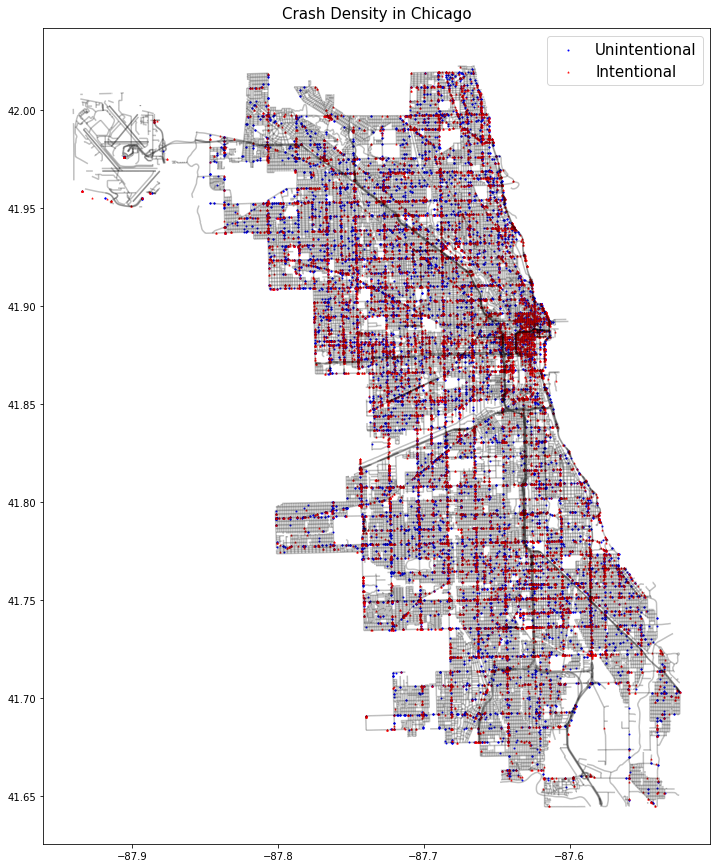

In [22]:
# Plot the coordinates
fig, ax = plt.subplots(figsize=(15, 15))
street_map.plot(ax=ax, alpha=0.25, color='black')
geo_df[geo_df['PRIM_CONTRIBUTORY_CAUSE'] == 0].plot(ax=ax, markersize=1, color='blue', marker='o', label='Unintentional')
geo_df[geo_df['PRIM_CONTRIBUTORY_CAUSE'] == 1].plot(ax=ax, markersize=1, color='red', marker='^', label='Intentional')
plt.legend(prop={'size':15})
plt.title('Crash Density in Chicago', fontsize=15, pad=10)
plt.savefig(r'Graphs\street_map.png', bbox_inches='tight');

From the map above you can see there is a high density of accidents in the downtown area of Chicago. It is also mostly red, which means that most of the accidents in that area are caused due to intent or driver error. However, we can also see blue plots spread all across the map, which suggests that there are good amount of accidents that are caused unintentionally or have an opportunity of improvement. Let's dive into EDA 2 and 3 to investigate this.

### EDA 2: Analyze control failures to identify opportunities for improvement

In [23]:
df_final.columns

Index(['MANEUVER', 'SEX', 'AGE', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [24]:
factors = df_final[['DRIVER_VISION','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
                    'WEATHER_CONDITION','LIGHTING_CONDITION',
                    'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND',
                    'ROAD_DEFECT','PRIM_CONTRIBUTORY_CAUSE']].copy()

For this part of EDA we will only use accidents that were caused 'Unintentionally' as this presents us an opportunity to investigate the root cause and help identify areas for improvement.

In [25]:
control_failures = factors[factors.PRIM_CONTRIBUTORY_CAUSE == 0].copy()

In [26]:
control_failures.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1, inplace=True)

In [27]:
control_failures.columns

Index(['DRIVER_VISION', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT'],
      dtype='object')

We will have to create a dictionary to store the value counts of all predictors so we can plot them.

In [28]:
count_dict = {}
for col in control_failures.columns:
    count_dict[str(col)] = control_failures[col].value_counts()

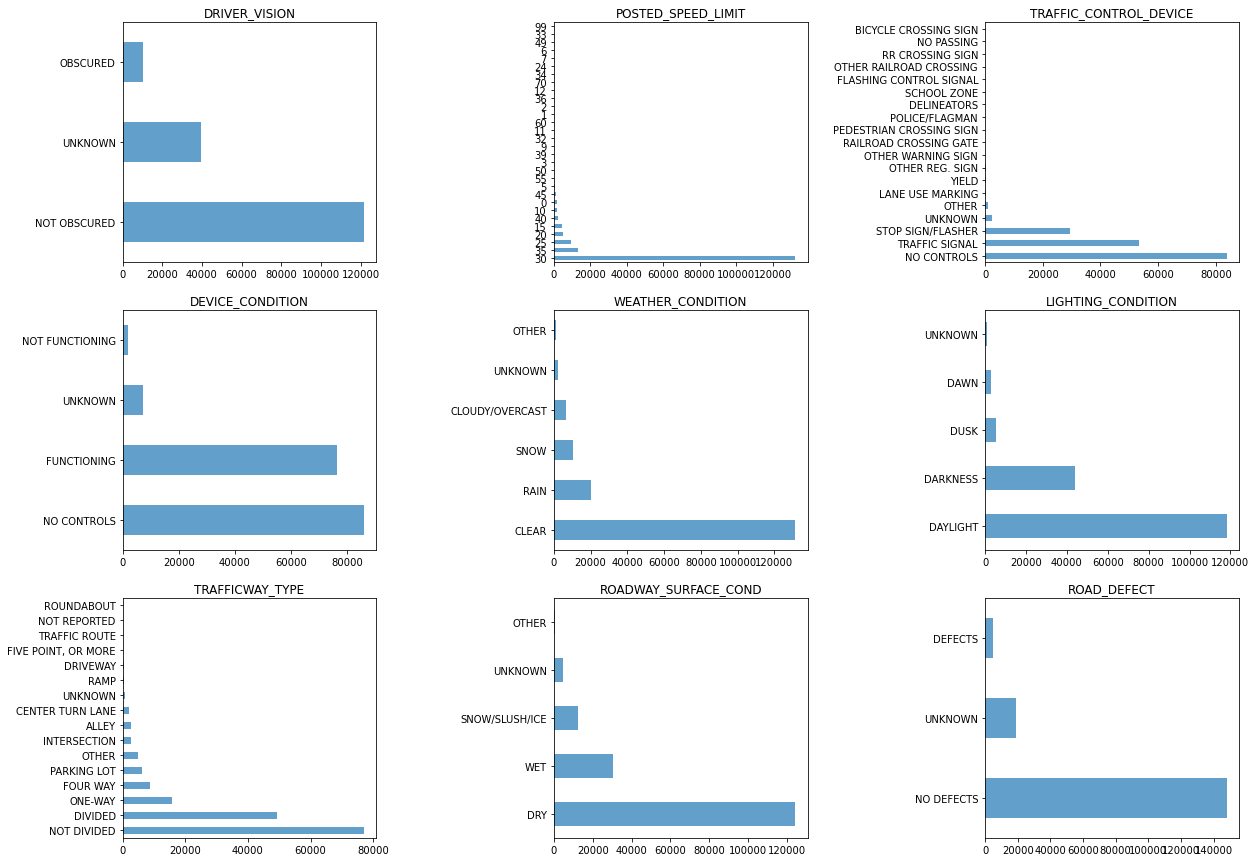

In [29]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.7)

for index, value in enumerate(count_dict):
    ax = plt.subplot(3, 3, index+1)
    chart = pd.DataFrame(count_dict[value])
    chart.plot(ax=ax, kind='barh', legend=False, alpha=0.7)
    ax.set_title(value)
    plt.savefig(r'Graphs\predictor_plots.png', bbox_inches='tight');

From the above plots we can make out the following deduction:

* Most of the accidents have occured when the Driver vision was 'Not Obscured' and presumably was driving at a safe speed limit of 30 mph.
* However, having 'No Traffic Control Devices' has contributed the most to the number of accidents in Chicago. According to this, increasing the number of traffic control devices in the city can lead to a decrease in the number of unintentional accidents. This is also confirmed in the Device Condition plot which shows the highest count when having no controls.
* The weather condition and lighting condition does not seem to contribute much to the accidents.
* We can also see most of the accidents occuring where the trafficway type is 'Not Divided'. This means that dividing the roads can prevent more of these accidents.
* Finally, the roadway surface condition and road defect does not seem to cause much of these accidents either.

### EDA 3: Check for trends in the time of crash to relocate resources appropriately

For this part of the EDA we will use both the intenational and unintentional crash data.

In [30]:
time_of_crash = df_final[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']].copy()

In [31]:
time_of_crash

,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,22,2,4
1,15,2,2
2,15,2,2
3,13,6,2
4,12,7,2
...,...,...,...
404321,23,5,3
404322,18,5,3
404323,18,5,3
404324,23,5,3


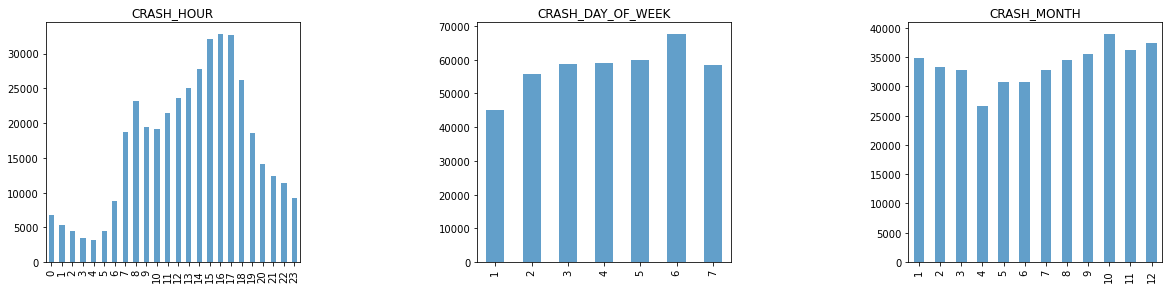

In [32]:
# Plot the graphs
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.7)

for index, value in enumerate(time_of_crash):
    ax = plt.subplot(3, 3, index+1)
    chart_2 = pd.DataFrame(time_of_crash[value].value_counts()).sort_index()
    chart_2.plot(ax=ax, kind='bar', legend=False, alpha=0.7)
    ax.set_title(value)
    plt.savefig(r'Graphs\time_of_crash.png', bbox_inches='tight');

From the above plots we can see the following trends in time of crash:
    
* Most of the crashes seem to happen between the hours of 4 to 6 in the evening. This might be due to peak rush hour traffic where every one is trying to get back home from work. When we connect this with the crash density map, we can deduce that most of the accidents in Chicago are occuring in the Downtown area during these hours where people are rushing to get home from work. There needs to be better traffic management at these times. We can recommend the city to have more facilitators in the Downtown area during these hours to help manage the flow of traffic and reduce the number of accidents.
* For day of the week, we see increased number of accidents during the weekends. However, they do not differ by much from other days. Looking at this we can say that there should be more focus on the crash hour than the crash day as the crashes dont differ much between the days.
* In terms of crash month, the crashse are pretty consistent all year long. Except for April where we the crashses are the lowest. Currently, we do not have anything to support this so we will assume crashes to be consistent all year long.

Now that we are done with our case analysis let's move on to create a classifier that will classify accidents into 'Unintentional', and 'Intentional' depending on all the predictors we have in our dataset.

This will be continued in Book 3. Please find the file along with all the other downloads.